In [ ]:
!pip install -q "huggingface_hub>=0.23.0" "datasets>=2.19.0"

from huggingface_hub import login

login("Token Girilecek")


In [ ]:
from datasets import load_dataset

dataset = load_dataset("alibayram/doktorsitesi")
dataset


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.16k [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/67.5M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/150105 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/37527 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['doctor_title', 'doctor_speciality', 'question_content', 'question_answer'],
        num_rows: 150105
    })
    test: Dataset({
        features: ['doctor_title', 'doctor_speciality', 'question_content', 'question_answer'],
        num_rows: 37527
    })
})

In [ ]:
train_ds = dataset["train"]

print("Sütunlar:", train_ds.column_names)
print("\nİlk kayıt:")
print(train_ds[0])


Sütunlar: ['doctor_title', 'doctor_speciality', 'question_content', 'question_answer']

İlk kayıt:
{'doctor_title': 'Uzm. Dr.', 'doctor_speciality': 'cocuk-sagligi-ve-hastaliklari', 'question_content': 'aylin hanım merhaba.3 aylık bir kızım var.emerken sütü genzine kaçırıyor.bunun akciğerlere kaçabileceğini ve çok zararlı olacağını duydum.her ay kontrole götürüyoruz kzımı.ancak bu arada akciğere kaçıp kaçmadığının bir belirtisi olur mu bebekte.bunu gözlemeleyebilir miyim?dik emzirmeme rağmen bu durumun önüne geçemiyorum ve çok endişeleniyorum.bir de kızımn emme süresi 5-6 dk düştü.acaba bu sürede doyuyor mudur?ağlama huzursuzluk gibi bir durum yok.çok teşekkürler...', 'question_answer': 'merhaba eylem hanım,eğer akciğerlere kaçırısanız hırıltılı solunum ileri zamanda ateş gibi bulgular olabilir.5-6 dakika emmesi aylık kilo alımı normal isesorun değil.sevgiler'}


In [ ]:
import pandas as pd

df = train_ds.to_pandas()

print("Toplam kayıt sayısı:", len(df))
print("\nEksik değer sayıları:")
print(df.isnull().sum())
display(df["doctor_speciality"].unique())

print("\nEn sık 20 uzmanlık:")
print(df["doctor_speciality"].value_counts().head(20))


Toplam kayıt sayısı: 150105

Eksik değer sayıları:
doctor_title         0
doctor_speciality    0
question_content     0
question_answer      0
dtype: int64


array(['cocuk-sagligi-ve-hastaliklari', 'ortopedi-ve-travmatoloji',
       'kadin-hastaliklari-ve-dogum',
       'kadin-hastaliklari-ve-dogum-jinekolojik-onkoloji',
       'tibbi-genetik', 'fiziksel-tip-ve-rehabilitasyon', 'uroloji',
       'beyin-ve-sinir-cerrahisi', 'uroloji-androloji',
       'noroloji-klinik-norofizyoloji',
       'dahiliye-ve-ic-hastaliklari-gastroenteroloji',
       'cocuk-sagligi-ve-hastaliklari-cocuk-gogus-hastaliklari',
       'radyasyon-onkolojisi', 'dahiliye-ve-ic-hastaliklari-nefroloji',
       'dermatoloji', 'pratisyen-hekimlik', 'genel-cerrahi',
       'gogus-hastaliklari', 'dis-hekimi-ortodonti',
       'dis-hekimi-endodonti', 'goz-hastaliklari', 'psikiyatri',
       'cocuk-sagligi-ve-hastaliklari-cocuk-immunolojisi-ve-alerji-hastaliklari',
       'psikoloji', 'genel-cerrahi-cerrahi-onkoloji',
       'kadin-hastaliklari-ve-dogum-ureme-endokrinolojisi-ve-infertilite',
       'cocuk-sagligi-ve-hastaliklari-cocuk-norolojisi', 'noroloji',
       'cocuk-sagli


En sık 20 uzmanlık:
doctor_speciality
kadin-hastaliklari-ve-dogum                                                28621
beyin-ve-sinir-cerrahisi                                                   11117
uroloji                                                                     9301
ortopedi-ve-travmatoloji                                                    6336
kadin-hastaliklari-ve-dogum-jinekolojik-onkoloji                            6099
genel-cerrahi                                                               5858
dahiliye-ve-ic-hastaliklari-nefroloji                                       5628
plastik-rekonstruktif-ve-estetik-cerrahi                                    4373
kulak-burun-bogaz-hastaliklari                                              4210
kadin-hastaliklari-ve-dogum-ureme-endokrinolojisi-ve-infertilite            4055
fiziksel-tip-ve-rehabilitasyon                                              3935
dahiliye-ve-ic-hastaliklari-gastroenteroloji                          

In [ ]:
import re
import unicodedata

RE_ANY_STAR = re.compile(r"\*{2,}")
RE_URL   = re.compile(r"(https?://\S+|www\.\S+)", re.IGNORECASE)
RE_EMAIL = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b", re.IGNORECASE)
RE_PHONE_ANY = re.compile(r"\b(?:\+?\d{1,3}\s*)?(?:0\s*)?(?:\(?\d{3}\)?[\s\-.]?)\d{3}[\s\-.]?\d{2}[\s\-.]?\d{2}\b")
RE_PHONE_TR_LOOSE = re.compile(r"(?:\+?90\s*)?(?:0\s*)?5\s*\d\s*\d\s*\d\s*\d\s*\d\s*\d\s*\d\s*\d\s*\d\s*\d")

RE_DOC_TITLE_LINE = re.compile(
    r"(?im)^\s*(prof|doç|op|uzm|yrd)\.?\s*(dr\.|psk\.|öğr\.)?.*$"
)
RE_PROMO_LINE = re.compile(
    r"(?im)^\s*.*\b(randevu|iletişim|telefon|tel\.?|gsm|whatsapp|muayenehane|klinik|web\s*sitesi|siteye\s*gir|adresine\s*gir|bizi\s*ara)\b.*$"
)

RE_DOCTOR_NAME = re.compile(
    r"(?:Prof|Op|Uzm|Doç|Yrd)\.?\s+(?:Dr\.)?\s*(?:[A-ZİĞÜŞÖÇ][a-zığüşöç]+\s+){1,3}",
    re.IGNORECASE
)

RE_WS = re.compile(r"\s+")

def normalize_chars(x: str) -> str:
    x = "" if x is None else str(x)
    x = unicodedata.normalize("NFKC", x)
    x = x.replace("İ", "i").replace("I", "ı")
    return x

def clean_text(x: str, remove_doctor_names: bool = False) -> str:
    x = normalize_chars(x)

    x = x.replace("\r\n", "\n").replace("\r", "\n")
    x = RE_DOC_TITLE_LINE.sub(" ", x)
    x = RE_PROMO_LINE.sub(" ", x)

    if remove_doctor_names:
        x = RE_DOCTOR_NAME.sub(" ", x)

    x = RE_WS.sub(" ", x).strip()
    return x

def is_row_keepable_strict(q, a, s, q_min=20, q_max=2000, a_min=50, a_max=2500):
    if q is None or a is None or s is None:
        return False

    raw_q = str(q)
    raw_a = str(a)

    if RE_ANY_STAR.search(raw_q) or RE_ANY_STAR.search(raw_a):
        return False

    if (RE_URL.search(raw_q) or RE_EMAIL.search(raw_q) or RE_PHONE_ANY.search(raw_q) or RE_PHONE_TR_LOOSE.search(raw_q)):
        return False
    if (RE_URL.search(raw_a) or RE_EMAIL.search(raw_a) or RE_PHONE_ANY.search(raw_a) or RE_PHONE_TR_LOOSE.search(raw_a)):
        return False

    if len(raw_q) < q_min or len(raw_q) > q_max:
        return False
    if len(raw_a) < a_min or len(raw_a) > a_max:
        return False

    return True

print("Ham:", len(df))

mask = df.apply(lambda r: is_row_keepable_strict(r["question_content"], r["question_answer"], r["doctor_speciality"]), axis=1)
df_clean = df[mask].copy()
print("Strict filter sonrası:", len(df_clean))

df_clean["question_clean"] = df_clean["question_content"].apply(lambda x: clean_text(x, remove_doctor_names=False))
df_clean["answer_clean"]   = df_clean["question_answer"].apply(lambda x: clean_text(x, remove_doctor_names=True))

df_clean = df_clean[df_clean["question_clean"].str.len() >= 15].copy()
df_clean = df_clean[df_clean["answer_clean"].str.len() >= 30].copy()

df_clean = df_clean.drop_duplicates(subset=["question_clean"]).copy()

print("Final temiz:", len(df_clean))
df_clean[["doctor_speciality", "question_clean", "answer_clean"]].head(2)


Ham: 150105
Strict filter sonrası: 107690
Final temiz: 90305


,doctor_speciality,question_clean,answer_clean
0,cocuk-sagligi-ve-hastaliklari,aylin hanım merhaba.3 aylık bir kızım var.emer...,"merhaba eylem hanım,eğer akciğerlere kaçırısan..."
1,ortopedi-ve-travmatoloji,Merhabalar... şu anda 16 yaşında olan bir kız ...,sayın case bu konuda en net ve doğru bilgiyi s...


In [ ]:
min_count = 1500

speciality_counts = df_clean["doctor_speciality"].value_counts()
valid_specialities = speciality_counts[speciality_counts >= min_count].index.tolist()

print("1500+ uzmanlık sayısı:", len(valid_specialities))
print("Örnek ilk 20:", valid_specialities[:20])
print("\nEn sık 20 (temiz veri):")
print(speciality_counts.head(20))


1500+ uzmanlık sayısı: 16
Örnek ilk 20: ['kadin-hastaliklari-ve-dogum', 'uroloji', 'beyin-ve-sinir-cerrahisi', 'ortopedi-ve-travmatoloji', 'dahiliye-ve-ic-hastaliklari-nefroloji', 'genel-cerrahi', 'kadin-hastaliklari-ve-dogum-jinekolojik-onkoloji', 'fiziksel-tip-ve-rehabilitasyon', 'kadin-hastaliklari-ve-dogum-ureme-endokrinolojisi-ve-infertilite', 'kulak-burun-bogaz-hastaliklari', 'cocuk-sagligi-ve-hastaliklari', 'cocuk-sagligi-ve-hastaliklari-cocuk-norolojisi', 'plastik-rekonstruktif-ve-estetik-cerrahi', 'psikiyatri', 'dermatoloji', 'dahiliye-ve-ic-hastaliklari-endokrinoloji-ve-metabolizma-hastaliklari']

En sık 20 (temiz veri):
doctor_speciality
kadin-hastaliklari-ve-dogum                                              18214
uroloji                                                                   4828
beyin-ve-sinir-cerrahisi                                                  4385
ortopedi-ve-travmatoloji                                                  4372
dahiliye-ve-ic-hastaliklari

In [ ]:
max_per_class = 4000

df_cls = df_clean[df_clean["doctor_speciality"].isin(valid_specialities)].copy()

num_classes = 20
top_specs = df_cls["doctor_speciality"].value_counts().head(num_classes).index.tolist()
df_cls = df_cls[df_cls["doctor_speciality"].isin(top_specs)].copy()

df_balanced = (
    df_cls.groupby("doctor_speciality", group_keys=False)
          .apply(lambda g: g.sample(n=min(len(g), max_per_class), random_state=42))
          .reset_index(drop=True)
)

print("Dengelenmiş toplam kayıt sayısı:", len(df_balanced))
print("\nDengelenmiş dağılım:")
print(df_balanced["doctor_speciality"].value_counts())


Dengelenmiş toplam kayıt sayısı: 48816

Dengelenmiş dağılım:
doctor_speciality
beyin-ve-sinir-cerrahisi                                                 4000
dahiliye-ve-ic-hastaliklari-nefroloji                                    4000
ortopedi-ve-travmatoloji                                                 4000
kadin-hastaliklari-ve-dogum                                              4000
uroloji                                                                  4000
genel-cerrahi                                                            3850
kadin-hastaliklari-ve-dogum-jinekolojik-onkoloji                         3771
fiziksel-tip-ve-rehabilitasyon                                           2970
kadin-hastaliklari-ve-dogum-ureme-endokrinolojisi-ve-infertilite         2944
kulak-burun-bogaz-hastaliklari                                           2880
cocuk-sagligi-ve-hastaliklari                                            2469
cocuk-sagligi-ve-hastaliklari-cocuk-norolojisi                 

/tmp/ipython-input-2729645664.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=min(len(g), max_per_class), random_state=42))


In [ ]:
import numpy as np

unique_specialities = sorted(df_balanced["doctor_speciality"].unique())

label2id = {spec: idx for idx, spec in enumerate(unique_specialities)}
id2label = {idx: spec for spec, idx in label2id.items()}

df_balanced["label"] = df_balanced["doctor_speciality"].map(label2id).astype(int)

print("Toplam sınıf sayısı:", len(unique_specialities))
print("İlk 10 label2id eşleşmesi:")
for k, v in list(label2id.items())[:10]:
    print(v, "→", k)


Toplam sınıf sayısı: 16
İlk 10 label2id eşleşmesi:
0 → beyin-ve-sinir-cerrahisi
1 → cocuk-sagligi-ve-hastaliklari
2 → cocuk-sagligi-ve-hastaliklari-cocuk-norolojisi
3 → dahiliye-ve-ic-hastaliklari-endokrinoloji-ve-metabolizma-hastaliklari
4 → dahiliye-ve-ic-hastaliklari-nefroloji
5 → dermatoloji
6 → fiziksel-tip-ve-rehabilitasyon
7 → genel-cerrahi
8 → kadin-hastaliklari-ve-dogum
9 → kadin-hastaliklari-ve-dogum-jinekolojik-onkoloji


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df_balanced,
    test_size=0.15,
    stratify=df_balanced["label"],
    random_state=42
)

print("Train boyutu:", len(train_df))
print("Val boyutu:", len(val_df))

print("\nTrain label oranları:")
print(train_df["label"].value_counts(normalize=True).sort_index())

print("\nVal label oranları:")
print(val_df["label"].value_counts(normalize=True).sort_index())


Train boyutu: 41493
Val boyutu: 7323

Train label oranları:
label
0     0.081942
1     0.050587
2     0.047189
3     0.033186
4     0.081942
5     0.035114
6     0.060830
7     0.078857
8     0.081942
9     0.077242
10    0.060299
11    0.058998
12    0.081942
13    0.044634
14    0.043357
15    0.081942
Name: proportion, dtype: float64

Val label oranları:
label
0     0.081934
1     0.050526
2     0.047112
3     0.033183
4     0.081934
5     0.035095
6     0.060904
7     0.078929
8     0.081934
9     0.077291
10    0.060358
11    0.058992
12    0.081934
13    0.044654
14    0.043288
15    0.081934
Name: proportion, dtype: float64


In [ ]:
from datasets import load_dataset

dataset = load_dataset("alibayram/doktorsitesi")
test_df_raw = dataset["test"].to_pandas()

mask_test = test_df_raw.apply(
    lambda r: is_row_keepable_strict(r["question_content"], r["question_answer"], r["doctor_speciality"]),
    axis=1
)
test_df = test_df_raw[mask_test].copy()

test_df["question_clean"] = test_df["question_content"].apply(lambda x: clean_text(x, remove_doctor_names=False))
test_df["answer_clean"]   = test_df["question_answer"].apply(lambda x: clean_text(x, remove_doctor_names=True))

test_df = test_df[test_df["question_clean"].str.len() >= 15].copy()
test_df = test_df[test_df["answer_clean"].str.len() >= 30].copy()

test_df = test_df[test_df["doctor_speciality"].isin(unique_specialities)].copy()

test_df["label"] = test_df["doctor_speciality"].map(label2id)

before = len(test_df)
test_df = test_df.dropna(subset=["label"]).copy()
test_df["label"] = test_df["label"].astype(int)
after = len(test_df)

print("Filtrelenmiş test boyutu:", after, "(düşen kayıt sayısı:", before - after, ")")
print("\nTest label oranları:")
print(test_df["label"].value_counts(normalize=True).sort_index())


Filtrelenmiş test boyutu: 17888 (düşen kayıt sayısı: 0 )

Test label oranları:
label
0     0.070159
1     0.037511
2     0.033374
3     0.026442
4     0.063059
5     0.027504
6     0.045394
7     0.063506
8     0.271802
9     0.057189
10    0.046344
11    0.042319
12    0.069264
13    0.034381
14    0.035555
15    0.076196
Name: proportion, dtype: float64


In [ ]:
test_df = test_df[test_df["doctor_speciality"].isin(unique_specialities)].copy()

test_df["label"] = test_df["doctor_speciality"].map(label2id)

before = len(test_df)
test_df = test_df.dropna(subset=["label"]).copy()
test_df["label"] = test_df["label"].astype(int)
after = len(test_df)

print("Filtrelenmiş test boyutu:", after, "(düşen kayıt sayısı:", before - after, ")")
print("\nTest label oranları:")
print(test_df["label"].value_counts(normalize=True).sort_index())


Filtrelenmiş test boyutu: 17888 (düşen kayıt sayısı: 0 )

Test label oranları:
label
0     0.070159
1     0.037511
2     0.033374
3     0.026442
4     0.063059
5     0.027504
6     0.045394
7     0.063506
8     0.271802
9     0.057189
10    0.046344
11    0.042319
12    0.069264
13    0.034381
14    0.035555
15    0.076196
Name: proportion, dtype: float64


In [ ]:
train_df.to_parquet("train_cls.parquet", index=False)
val_df.to_parquet("val_cls.parquet", index=False)
test_df.to_parquet("test_cls.parquet", index=False)


In [ ]:
!pip install -q scikit-learn pandas matplotlib


In [ ]:
X_train = train_df["question_clean"].astype(str)
y_train = train_df["label"].astype(int)

X_val   = val_df["question_clean"].astype(str)
y_val   = val_df["label"].astype(int)

X_test  = test_df["question_clean"].astype(str)
y_test  = test_df["label"].astype(int)

num_classes = len(train_df["label"].unique())
print("Sınıf sayısı:", num_classes)


Sınıf sayısı: 16


In [ ]:
print("Train columns:", train_df.columns.tolist())
assert "question_clean" in train_df.columns, "question_clean yok. Temizleme hücresini doğru sırada çalıştırmadın."


Train columns: ['doctor_title', 'doctor_speciality', 'question_content', 'question_answer', 'question_clean', 'answer_clean', 'label']


In [ ]:
!pip install -q TurkishStemmer

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from TurkishStemmer import TurkishStemmer

def ensure_nltk_resource(path: str, download_name: str):
    try:
        nltk.data.find(path)
    except LookupError:
        nltk.download(download_name)

ensure_nltk_resource("corpora/stopwords", "stopwords")
ensure_nltk_resource("tokenizers/punkt", "punkt")

try:
    nltk.data.find("tokenizers/punkt_tab")
except LookupError:
    try:
        nltk.download("punkt_tab")
    except:
        pass

turkish_stopwords = set(stopwords.words("turkish"))
stemmer = TurkishStemmer()

re_digits = re.compile(r"\d+")
re_non_turkish = re.compile(r"[^a-zçğıöşü\s]")
re_multi_space = re.compile(r"\s+")

def preprocess_text_stemmer(text: str) -> str:
    """
    Klasik ML modelleri (TF-IDF + LogReg/SVM) için:
    - Türkçe lower
    - Sayıları 'num' ile değiştir
    - Noktalama ve özel karakterleri temizle
    - Stopword + kısa token filtrele
    - TurkishStemmer ile kök bul
    """
    if not isinstance(text, str):
        text = str(text)

    text = text.replace("İ", "i").replace("I", "ı").lower()

    text = re_digits.sub(" num ", text)

    text = re_non_turkish.sub(" ", text)

    text = re_multi_space.sub(" ", text).strip()

    if not text:
        return ""

    try:
        tokens = word_tokenize(text)
    except LookupError:
        tokens = wordpunct_tokenize(text)

    cleaned_tokens = []
    for tok in tokens:
        tok = tok.strip()
        if not tok:
            continue

        if tok in turkish_stopwords:
            continue
        if len(tok) <= 2:
            continue

        stem = stemmer.stem(tok)

        if stem and stem not in turkish_stopwords:
            cleaned_tokens.append(stem)

    return " ".join(cleaned_tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def preprocess_for_transformer(text: str) -> str:
    """
    Transformer modelleri için minimum temizlik:
    - Tip garantisi (str'e çevir)
    - Baştaki/sondaki boşlukları temizle
    - Çoklu boşlukları tek boşluğa indir
    """
    if not isinstance(text, str):
        text = str(text)

    text = text.strip()
    text = re_multi_space.sub(" ", text)
    return text

In [ ]:

X_train_clean = train_df["question_clean"].astype(str).apply(preprocess_text_stemmer)
X_val_clean   = val_df["question_clean"].astype(str).apply(preprocess_text_stemmer)
X_test_clean  = test_df["question_clean"].astype(str).apply(preprocess_text_stemmer)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=20000,
)

X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_val_tfidf   = tfidf.transform(X_val_clean)
X_test_tfidf  = tfidf.transform(X_test_clean)


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

results = {}

def evaluate_model(name, clf, X_tr, y_tr, X_v, y_v, X_te, y_te, save_cm=True):
    print(f"\n===== {name} =====")

    y_tr_pred = clf.predict(X_tr)
    acc_tr = accuracy_score(y_tr, y_tr_pred)
    p_tr, r_tr, f1_tr, _ = precision_recall_fscore_support(
        y_tr, y_tr_pred, average="macro", zero_division=0
    )
    print(f"[Train] Acc: {acc_tr:.4f} | Macro P: {p_tr:.4f} | Macro R: {r_tr:.4f} | Macro F1: {f1_tr:.4f}")

    y_v_pred = clf.predict(X_v)
    acc_v = accuracy_score(y_v, y_v_pred)
    p_v, r_v, f1_v, _ = precision_recall_fscore_support(
        y_v, y_v_pred, average="macro", zero_division=0
    )
    print(f"[Val]   Acc: {acc_v:.4f} | Macro P: {p_v:.4f} | Macro R: {r_v:.4f} | Macro F1: {f1_v:.4f}")

    y_te_pred = clf.predict(X_te)
    acc_te = accuracy_score(y_te, y_te_pred)
    p_te, r_te, f1_te, _ = precision_recall_fscore_support(
        y_te, y_te_pred, average="macro", zero_division=0
    )
    print(f"[Test]  Acc: {acc_te:.4f} | Macro P: {p_te:.4f} | Macro R: {r_te:.4f} | Macro F1: {f1_te:.4f}")

    cm = None
    if save_cm:
        cm = confusion_matrix(y_te, y_te_pred, normalize="true")

    results[name] = {
        "acc_train": acc_tr, "prec_train": p_tr, "rec_train": r_tr, "f1_train": f1_tr,
        "acc_val": acc_v,   "prec_val": p_v,   "rec_val": r_v,   "f1_val": f1_v,
        "acc_test": acc_te, "prec_test": p_te, "rec_test": r_te, "f1_test": f1_te,
        "cm_test_norm": cm,
    }

    return y_te_pred


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

Cs = [0.1, 0.5, 1.0, 3.0, 10.0]
best_C = None
best_val_f1 = -1.0
best_logreg = None

for C in Cs:
    clf = LogisticRegression(
        max_iter=2000,
        n_jobs=-1,
        multi_class="multinomial",
        solver="saga",
        C=C,
        random_state=42,
    )
    clf.fit(X_train_tfidf, y_train)

    y_val_pred = clf.predict(X_val_tfidf)
    _, _, f1_val, _ = precision_recall_fscore_support(
        y_val, y_val_pred, average="macro", zero_division=0
    )
    print(f"[LogReg] C={C} için Val Macro F1 = {f1_val:.4f}")

    if f1_val > best_val_f1:
        best_val_f1 = f1_val
        best_C = C
        best_logreg = clf

print(f"\n[LogReg] En iyi C: {best_C} | En iyi Val Macro F1: {best_val_f1:.4f}")

y_test_pred_logreg = evaluate_model(
    f"TF-IDF + Logistic Regression (C={best_C})",
    best_logreg,
    X_train_tfidf, y_train,
    X_val_tfidf, y_val,
    X_test_tfidf, y_test
)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[LogReg] C=0.1 için Val Macro F1 = 0.5872


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[LogReg] C=0.5 için Val Macro F1 = 0.6419


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[LogReg] C=1.0 için Val Macro F1 = 0.6497


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[LogReg] C=3.0 için Val Macro F1 = 0.6473


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[LogReg] C=10.0 için Val Macro F1 = 0.6366

[LogReg] En iyi C: 1.0 | En iyi Val Macro F1: 0.6497

===== TF-IDF + Logistic Regression (C=1.0) =====
[Train] Acc: 0.8031 | Macro P: 0.8081 | Macro R: 0.7976 | Macro F1: 0.8006
[Val]   Acc: 0.6516 | Macro P: 0.6579 | Macro R: 0.6489 | Macro F1: 0.6497
[Test]  Acc: 0.6438 | Macro P: 0.6403 | Macro R: 0.6648 | Macro F1: 0.6474


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_fscore_support

Cs_svm = [0.1, 0.5, 1.0, 3.0, 10.0]
best_C_svm = None
best_val_f1_svm = -1.0
best_svm = None

for C in Cs_svm:
    clf = LinearSVC(C=C, max_iter=5000)
    clf.fit(X_train_tfidf, y_train)

    y_val_pred = clf.predict(X_val_tfidf)
    _, _, f1_val, _ = precision_recall_fscore_support(
        y_val, y_val_pred, average="macro", zero_division=0
    )
    print(f"[SVM] C={C} için Val Macro F1 = {f1_val:.4f}")

    if f1_val > best_val_f1_svm:
        best_val_f1_svm = f1_val
        best_C_svm = C
        best_svm = clf

print(f"\n[SVM] En iyi C: {best_C_svm} | En iyi Val Macro F1: {best_val_f1_svm:.4f}")

y_test_pred_svm = evaluate_model(
    f"TF-IDF + Linear SVM (C={best_C_svm})",
    best_svm,
    X_train_tfidf, y_train,
    X_val_tfidf, y_val,
    X_test_tfidf, y_test
)


[SVM] C=0.1 için Val Macro F1 = 0.6545
[SVM] C=0.5 için Val Macro F1 = 0.6497
[SVM] C=1.0 için Val Macro F1 = 0.6389
[SVM] C=3.0 için Val Macro F1 = 0.6110
[SVM] C=10.0 için Val Macro F1 = 0.5919

[SVM] En iyi C: 0.1 | En iyi Val Macro F1: 0.6545

===== TF-IDF + Linear SVM (C=0.1) =====
[Train] Acc: 0.7992 | Macro P: 0.8040 | Macro R: 0.7959 | Macro F1: 0.7972
[Val]   Acc: 0.6572 | Macro P: 0.6608 | Macro R: 0.6563 | Macro F1: 0.6545
[Test]  Acc: 0.6467 | Macro P: 0.6374 | Macro R: 0.6705 | Macro F1: 0.6481


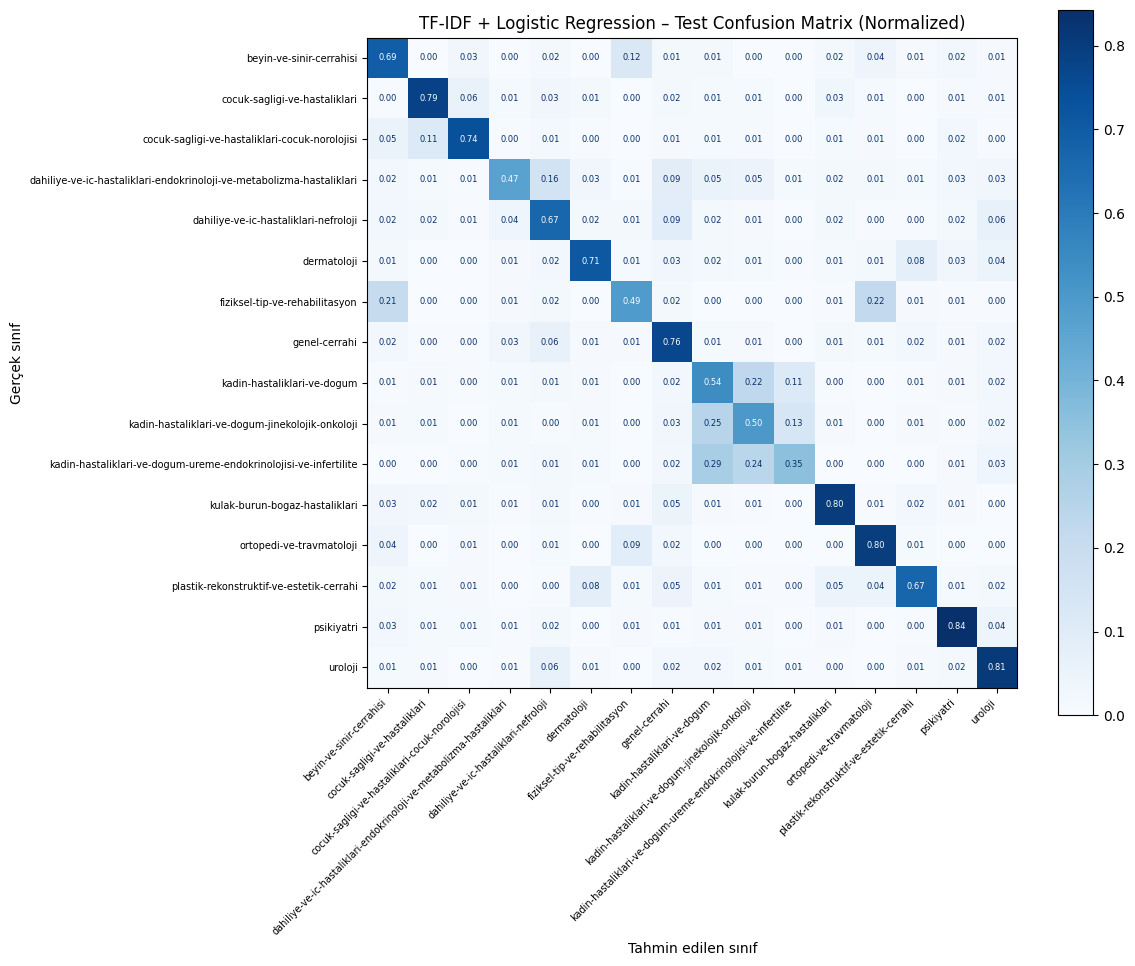

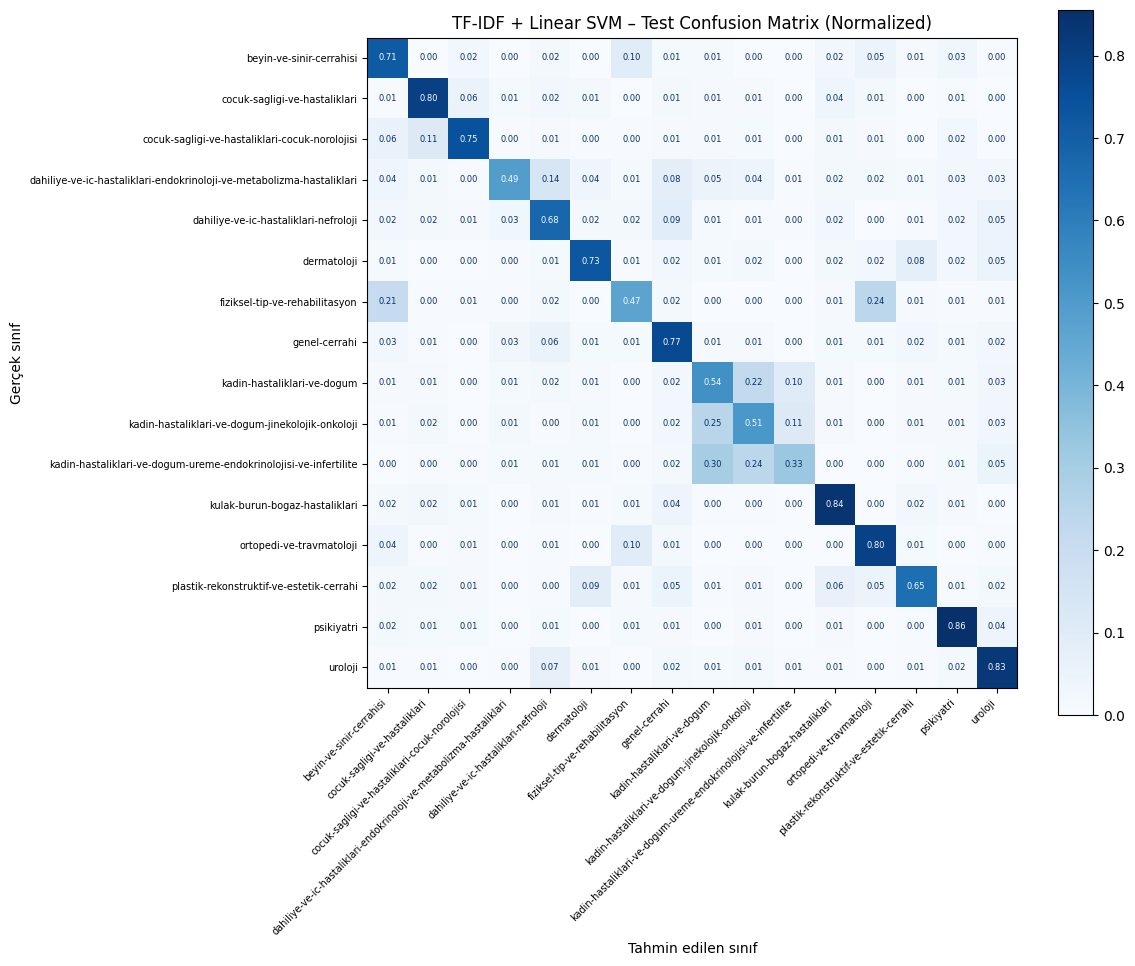

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix_model(y_true, y_pred, title, labels_text):
    cm = confusion_matrix(y_true, y_pred, normalize="true")

    fig, ax = plt.subplots(figsize=(12, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_text)
    disp.plot(
        ax=ax,
        cmap="Blues",
        colorbar=True,
        values_format=".2f",
    )

    ax.set_title(title)
    ax.set_xlabel("Tahmin edilen sınıf")
    ax.set_ylabel("Gerçek sınıf")

    ax.tick_params(axis="both", labelsize=7)
    plt.xticks(rotation=45, ha="right")

    # Hücre içi font küçük kalsın
    for text in disp.text_.ravel():
        text.set_fontsize(6)

    plt.tight_layout()
    plt.show()

labels_text = [id2label[i] for i in range(len(id2label))]  # branş isimleri

plot_confusion_matrix_model(
    y_test, y_test_pred_logreg,
    "TF-IDF + Logistic Regression – Test Confusion Matrix (Normalized)",
    labels_text
)

plot_confusion_matrix_model(
    y_test, y_test_pred_svm,
    "TF-IDF + Linear SVM – Test Confusion Matrix (Normalized)",
    labels_text
)


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve_model(name, estimator, X, y, cv=3, scoring="f1_macro"):
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        train_sizes=train_sizes,
        shuffle=True,
        random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    train_std  = train_scores.std(axis=1)
    val_mean   = val_scores.mean(axis=1)
    val_std    = val_scores.std(axis=1)

    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, marker="o", label=f"Train {scoring}")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(train_sizes, val_mean, marker="s", label=f"Validation {scoring}")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
    plt.title(f"Learning Curve – {name}")
    plt.xlabel("Eğitim örneği sayısı")
    plt.ylabel(scoring)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


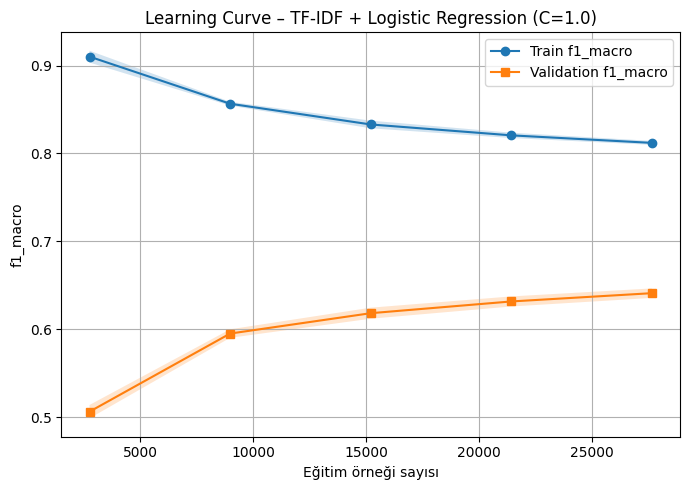

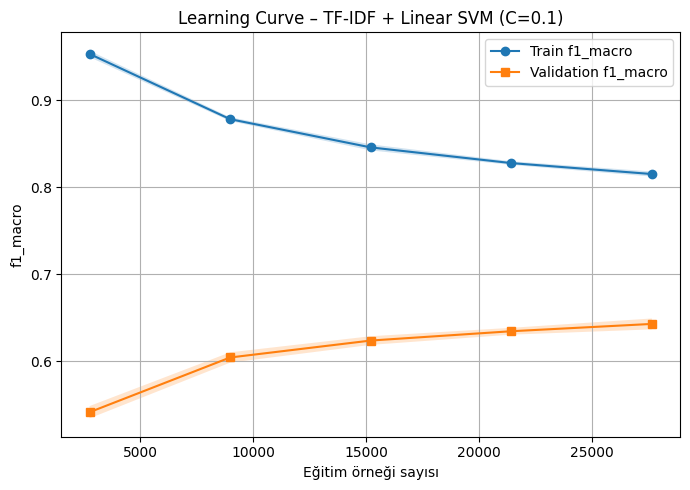

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg_lc = LogisticRegression(
    max_iter=2000,
    n_jobs=-1,
    multi_class="multinomial",
    solver="saga",
    C=best_C,
    random_state=42,
)

plot_learning_curve_model(
    f"TF-IDF + Logistic Regression (C={best_C})",
    logreg_lc,
    X_train_tfidf,
    y_train,
    scoring="f1_macro"
)

svm_lc = LinearSVC(
    C=best_C_svm,
    max_iter=5000
)

plot_learning_curve_model(
    f"TF-IDF + Linear SVM (C={best_C_svm})",
    svm_lc,
    X_train_tfidf,
    y_train,
    scoring="f1_macro"
)


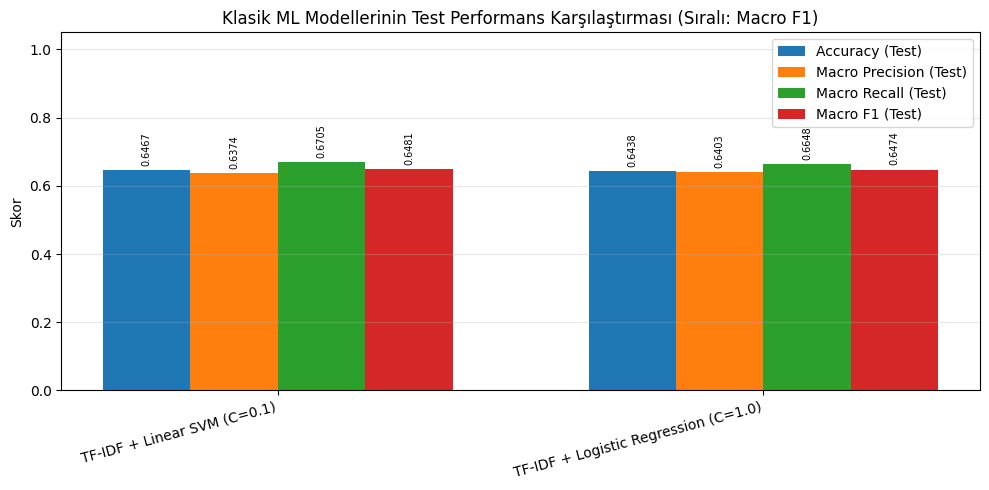

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = list(results.keys())

models = sorted(models, key=lambda m: results[m]["f1_test"], reverse=True)

acc_test  = [results[m]["acc_test"]  for m in models]
prec_test = [results[m]["prec_test"] for m in models]
rec_test  = [results[m]["rec_test"]  for m in models]
f1_test   = [results[m]["f1_test"]   for m in models]

x = np.arange(len(models))
width = 0.18

plt.figure(figsize=(10, 5))

bars1 = plt.bar(x - 1.5*width, acc_test,  width, label="Accuracy (Test)")
bars2 = plt.bar(x - 0.5*width, prec_test, width, label="Macro Precision (Test)")
bars3 = plt.bar(x + 0.5*width, rec_test,  width, label="Macro Recall (Test)")
bars4 = plt.bar(x + 1.5*width, f1_test,   width, label="Macro F1 (Test)")

def add_value_labels(bars):
    for bar in bars:
        h = bar.get_height()
        plt.annotate(f"{h:.4f}",
                     xy=(bar.get_x() + bar.get_width()/2, h),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha="center", va="bottom",
                     fontsize=7, rotation=90)

add_value_labels(bars1); add_value_labels(bars2); add_value_labels(bars3); add_value_labels(bars4)

plt.xticks(x, models, rotation=15, ha="right")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.title("Klasik ML Modellerinin Test Performans Karşılaştırması (Sıralı: Macro F1)")
plt.legend(loc="upper right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import joblib, json, os

os.makedirs("saved_models/ml", exist_ok=True)

joblib.dump(tfidf, "saved_models/ml/tfidf_vectorizer.joblib")
joblib.dump(best_logreg, "saved_models/ml/logreg_best.joblib")
joblib.dump(best_svm, "saved_models/ml/linearsvm_best.joblib")

with open("saved_models/ml/label2id.json", "w", encoding="utf-8") as f:
    json.dump(label2id, f, ensure_ascii=False, indent=2)

id2label_str = {str(k): v for k, v in id2label.items()}
with open("saved_models/ml/id2label.json", "w", encoding="utf-8") as f:
    json.dump(id2label_str, f, ensure_ascii=False, indent=2)

bundle = {
    "vectorizer": tfidf,
    "logreg": best_logreg,
    "svm": best_svm,
    "label2id": label2id,
    "id2label": id2label,
}
joblib.dump(bundle, "saved_models/ml/bundle.joblib")

print("Klasik ML modelleri + mapping kaydedildi (ayrı dosyalar + bundle).")


Klasik ML modelleri + mapping kaydedildi (ayrı dosyalar + bundle).


In [ ]:
!pip install -q transformers accelerate

import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer,
)
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("CUDA var mı?", torch.cuda.is_available())


CUDA var mı? True


In [ ]:

train_hf = Dataset.from_pandas(train_df[["question_clean", "label"]].reset_index(drop=True))
val_hf   = Dataset.from_pandas(val_df[["question_clean", "label"]].reset_index(drop=True))
test_hf  = Dataset.from_pandas(test_df[["question_clean", "label"]].reset_index(drop=True))

train_hf = train_hf.rename_column("question_clean", "text")
val_hf   = val_hf.rename_column("question_clean", "text")
test_hf  = test_hf.rename_column("question_clean", "text")

def hf_preprocess(batch):
    batch["text"] = [preprocess_for_transformer(t) for t in batch["text"]]
    return batch

train_hf = train_hf.map(hf_preprocess, batched=True)
val_hf   = val_hf.map(hf_preprocess, batched=True)
test_hf  = test_hf.map(hf_preprocess, batched=True)


print(train_hf[0])


Map:   0%|          | 0/41493 [00:00<?, ? examples/s]

Map:   0%|          | 0/7323 [00:00<?, ? examples/s]

Map:   0%|          | 0/17888 [00:00<?, ? examples/s]

{'text': 'merhaba .benım sol elimin serce parmağı ve yan parmağında bır uyuşukluk var sankı üzerine yatmışım gibi 5 gun oldu ama gecmedı kalp bölümüne yazdım sinirsel olabılır dediler yardımcı olursanız sevınırm', 'label': 0}


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def compute_metrics(eval_pred):
    if isinstance(eval_pred, tuple):
        logits, labels = eval_pred
    else:
        logits, labels = eval_pred.predictions, eval_pred.label_ids

    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    p, r, f1, _ = precision_recall_fscore_support(
        labels, preds, average="macro", zero_division=0
    )
    return {
        "accuracy": acc,
        "macro_precision": p,
        "macro_recall": r,
        "macro_f1": f1,
    }


def plot_training_curves(trainer, title_prefix=""):
    logs_df = pd.DataFrame(trainer.state.log_history)

    train_logs = logs_df[logs_df.get("loss").notna()].copy()
    eval_logs  = logs_df[logs_df.get("eval_loss").notna()].copy()

    if "step" not in train_logs.columns:
        train_logs["step"] = np.arange(len(train_logs))
    if "step" not in eval_logs.columns:
        eval_logs["step"] = np.arange(len(eval_logs))

    plt.figure(figsize=(7, 4))
    plt.plot(train_logs["step"], train_logs["loss"], label="Train loss")
    if len(eval_logs) > 0:
        plt.plot(eval_logs["step"], eval_logs["eval_loss"], label="Eval loss")
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} Loss vs Step")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    if len(eval_logs) > 0 and "eval_accuracy" in eval_logs.columns:
        plt.figure(figsize=(7, 4))
        plt.plot(eval_logs["step"], eval_logs["eval_accuracy"], label="Eval accuracy", marker="o")
        plt.xlabel("Step")
        plt.ylabel("Accuracy")
        plt.title(f"{title_prefix} Eval Accuracy vs Step")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def plot_confusion_matrix_transformer_labels(trainer, dataset, title):
    preds_output = trainer.predict(dataset)
    y_true = preds_output.label_ids
    y_pred = np.argmax(preds_output.predictions, axis=-1)

    cm = confusion_matrix(y_true, y_pred, normalize="true")
    labels = [id2label[i] for i in range(len(id2label))]

    fig, ax = plt.subplots(figsize=(12, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap="Blues", colorbar=True, values_format=".2f")
    plt.xticks(rotation=45, ha="right", fontsize=7)
    plt.yticks(fontsize=7)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


In [ ]:
results_tr = {}


In [ ]:
model_name_berturk = "dbmdz/bert-base-turkish-cased"
tokenizer_berturk = AutoTokenizer.from_pretrained(model_name_berturk)

def tokenize_berturk(batch):
    return tokenizer_berturk(
        batch["text"],
        truncation=True,
        max_length=128,
    )

train_tok_berturk = train_hf.map(tokenize_berturk, batched=True)
val_tok_berturk   = val_hf.map(tokenize_berturk, batched=True)
test_tok_berturk  = test_hf.map(tokenize_berturk, batched=True)

cols_to_remove = []
if "text" in train_tok_berturk.column_names:
    cols_to_remove.append("text")
if "__index_level_0__" in train_tok_berturk.column_names:
    cols_to_remove.append("__index_level_0__")

train_tok_berturk = train_tok_berturk.remove_columns([c for c in cols_to_remove if c in train_tok_berturk.column_names])
val_tok_berturk   = val_tok_berturk.remove_columns([c for c in cols_to_remove if c in val_tok_berturk.column_names])
test_tok_berturk  = test_tok_berturk.remove_columns([c for c in cols_to_remove if c in test_tok_berturk.column_names])

train_tok_berturk.set_format("torch")
val_tok_berturk.set_format("torch")
test_tok_berturk.set_format("torch")

model_berturk = AutoModelForSequenceClassification.from_pretrained(
    model_name_berturk,
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id,
)

batch_size = 16

args_berturk = TrainingArguments(
    output_dir="berturk-doctorsitesi",
    eval_strategy="steps",
    eval_steps=400,
    save_strategy="steps",
    save_steps=400,
    save_total_limit=1,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none",
    disable_tqdm=False,
    fp16=torch.cuda.is_available(),
)

trainer_berturk = Trainer(
    model=model_berturk,
    args=args_berturk,
    train_dataset=train_tok_berturk,
    eval_dataset=val_tok_berturk,
    tokenizer=tokenizer_berturk,
    data_collator=DataCollatorWithPadding(tokenizer_berturk),
    compute_metrics=compute_metrics,
)

trainer_berturk.train()


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/41493 [00:00<?, ? examples/s]

Map:   0%|          | 0/7323 [00:00<?, ? examples/s]

Map:   0%|          | 0/17888 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3753402899.py:64: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_berturk = Trainer(


Step,Training Loss,Validation Loss,Accuracy,Macro Precision,Macro Recall,Macro F1
400,1.286800,1.237061,0.567800,0.596370,0.564168,0.550033
800,1.108200,1.139533,0.600710,0.613820,0.597406,0.591439
1200,1.097700,1.084244,0.617916,0.604326,0.621816,0.600740
1600,1.072700,1.013459,0.635532,0.643430,0.636051,0.621211
2000,0.960300,0.994438,0.653557,0.650815,0.660906,0.651205
2400,1.023500,0.972354,0.646047,0.667825,0.649967,0.642065
2800,0.803500,0.969922,0.651509,0.661898,0.652332,0.641707
3200,0.772600,0.936313,0.672539,0.676295,0.674113,0.670379
3600,0.802700,0.949355,0.670217,0.675752,0.674022,0.670172
4000,0.834100,0.924897,0.668305,0.685538,0.672891,0.675480


TrainOutput(global_step=7782, training_loss=0.8824329572298691, metrics={'train_runtime': 598.8761, 'train_samples_per_second': 207.854, 'train_steps_per_second': 12.994, 'total_flos': 8181810871572864.0, 'train_loss': 0.8824329572298691, 'epoch': 3.0})

=== BERTurk – Validation Sonuçları ===


{'eval_loss': 0.9263705611228943, 'eval_accuracy': 0.685921070599481, 'eval_macro_precision': 0.6916606817474809, 'eval_macro_recall': 0.6896149914587226, 'eval_macro_f1': 0.688894059741878, 'eval_runtime': 8.0784, 'eval_samples_per_second': 906.494, 'eval_steps_per_second': 56.695, 'epoch': 3.0}

=== BERTurk – Test Sonuçları ===
{'eval_loss': 0.9293457269668579, 'eval_accuracy': 0.670505366726297, 'eval_macro_precision': 0.6816698339660265, 'eval_macro_recall': 0.7074073184264107, 'eval_macro_f1': 0.6882096151281811, 'eval_runtime': 20.5714, 'eval_samples_per_second': 869.555, 'eval_steps_per_second': 54.347, 'epoch': 3.0}


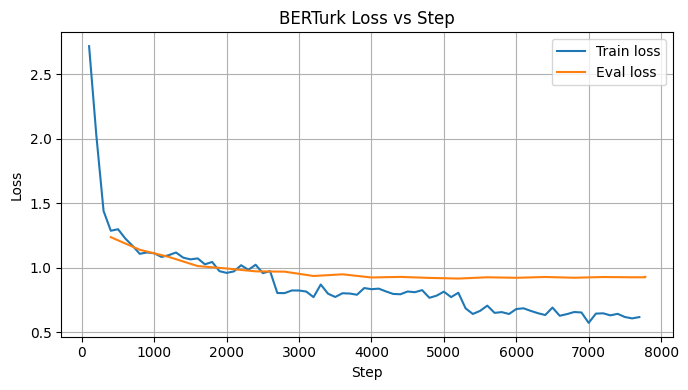

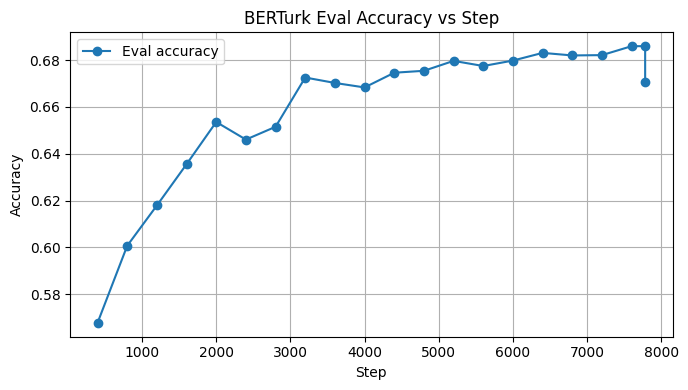

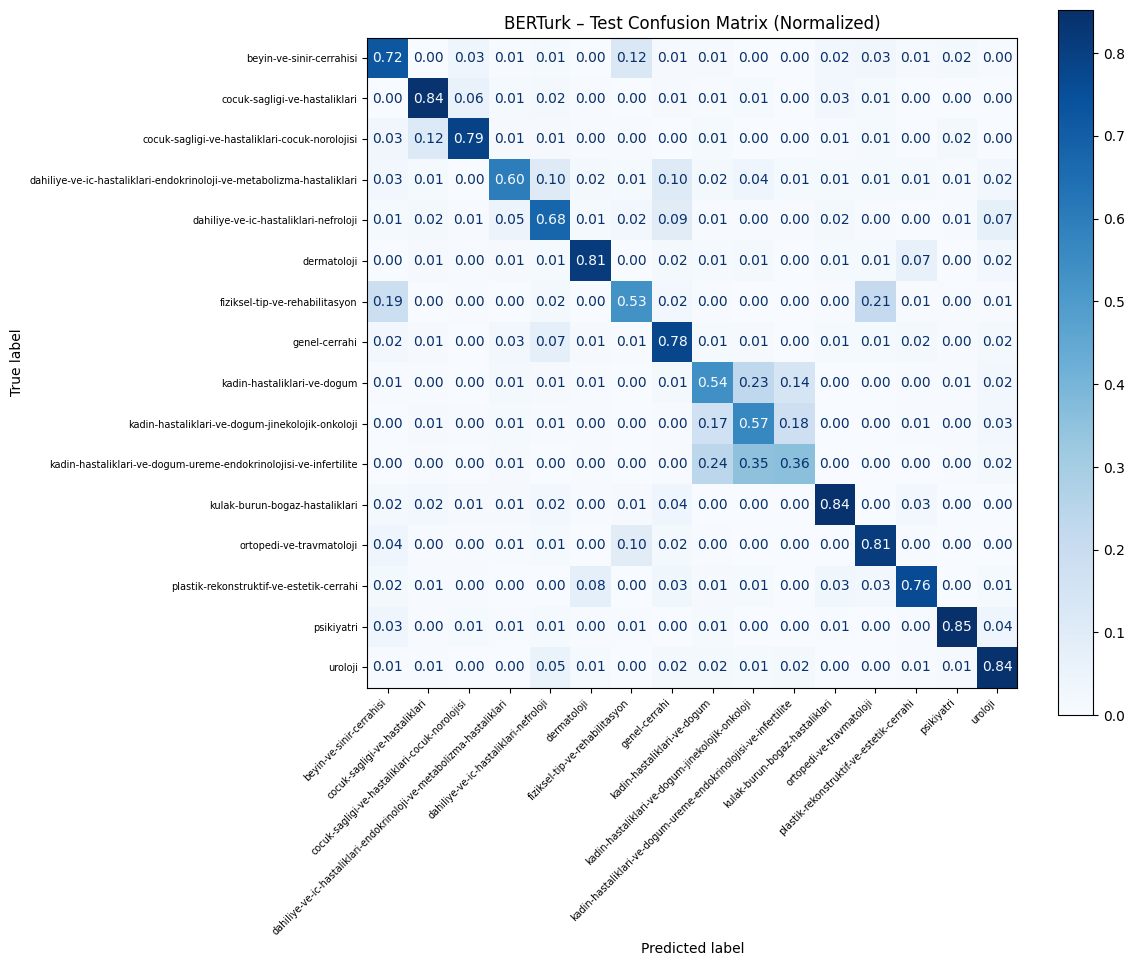

Val metric keys: ['eval_loss', 'eval_accuracy', 'eval_macro_precision', 'eval_macro_recall', 'eval_macro_f1', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch']
Test metric keys: ['eval_loss', 'eval_accuracy', 'eval_macro_precision', 'eval_macro_recall', 'eval_macro_f1', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch']


In [ ]:
print("=== BERTurk – Validation Sonuçları ===")
val_metrics_berturk = trainer_berturk.evaluate(eval_dataset=val_tok_berturk)
print(val_metrics_berturk)

print("\n=== BERTurk – Test Sonuçları ===")
test_metrics_berturk = trainer_berturk.evaluate(eval_dataset=test_tok_berturk)
print(test_metrics_berturk)

results_tr["BERTurk"] = {
    "val": val_metrics_berturk,
    "test": test_metrics_berturk,
}

plot_training_curves(trainer_berturk, title_prefix="BERTurk")

plot_confusion_matrix_transformer_labels(
    trainer_berturk,
    test_tok_berturk,
    "BERTurk – Test Confusion Matrix (Normalized)"
)
print("Val metric keys:", list(val_metrics_berturk.keys()))
print("Test metric keys:", list(test_metrics_berturk.keys()))



In [ ]:
import os

print("Best checkpoint:", trainer_berturk.state.best_model_checkpoint)

berturk_save_dir = "saved_models/berturk-doctorsitesi-best"
os.makedirs(berturk_save_dir, exist_ok=True)

trainer_berturk.model.save_pretrained(berturk_save_dir)
tokenizer_berturk.save_pretrained(berturk_save_dir)

print("BERTurk en iyi model ve tokenizer kaydedildi:", berturk_save_dir)


Best checkpoint: berturk-doctorsitesi/checkpoint-7600
BERTurk en iyi model ve tokenizer kaydedildi: saved_models/berturk-doctorsitesi-best


In [ ]:
model_name_xlmr = "xlm-roberta-base"
tokenizer_xlmr = AutoTokenizer.from_pretrained(model_name_xlmr)

def tokenize_xlmr(batch):
    return tokenizer_xlmr(
        batch["text"],
        truncation=True,
        max_length=128,
    )

train_tok_xlmr = train_hf.map(tokenize_xlmr, batched=True)
val_tok_xlmr   = val_hf.map(tokenize_xlmr, batched=True)
test_tok_xlmr  = test_hf.map(tokenize_xlmr, batched=True)

cols_to_remove = []
if "text" in train_tok_xlmr.column_names:
    cols_to_remove.append("text")
if "__index_level_0__" in train_tok_xlmr.column_names:
    cols_to_remove.append("__index_level_0__")

train_tok_xlmr = train_tok_xlmr.remove_columns([c for c in cols_to_remove if c in train_tok_xlmr.column_names])
val_tok_xlmr   = val_tok_xlmr.remove_columns([c for c in cols_to_remove if c in val_tok_xlmr.column_names])
test_tok_xlmr  = test_tok_xlmr.remove_columns([c for c in cols_to_remove if c in test_tok_xlmr.column_names])

train_tok_xlmr.set_format("torch")
val_tok_xlmr.set_format("torch")
test_tok_xlmr.set_format("torch")

model_xlmr = AutoModelForSequenceClassification.from_pretrained(
    model_name_xlmr,
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id,
)

args_xlmr = TrainingArguments(
    output_dir="xlmr-doctorsitesi",
    eval_strategy="steps",
    eval_steps=400,
    save_strategy="steps",
    save_steps=400,
    save_total_limit=1,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none",
    disable_tqdm=False,
    fp16=torch.cuda.is_available(),
)

# 5) Trainer
trainer_xlmr = Trainer(
    model=model_xlmr,
    args=args_xlmr,
    train_dataset=train_tok_xlmr,
    eval_dataset=val_tok_xlmr,
    tokenizer=tokenizer_xlmr,
    data_collator=DataCollatorWithPadding(tokenizer_xlmr),
    compute_metrics=compute_metrics,
)

trainer_xlmr.train()


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Map:   0%|          | 0/41493 [00:00<?, ? examples/s]

Map:   0%|          | 0/7323 [00:00<?, ? examples/s]

Map:   0%|          | 0/17888 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-713201170.py:62: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_xlmr = Trainer(


Step,Training Loss,Validation Loss,Accuracy,Macro Precision,Macro Recall,Macro F1
400,1.897000,1.626184,0.456097,0.403206,0.424874,0.388640
800,1.541000,1.425648,0.516318,0.501454,0.504058,0.474221
1200,1.404000,1.326495,0.550184,0.530124,0.532935,0.512141
1600,1.348600,1.181886,0.583231,0.565171,0.580366,0.552458
2000,1.217400,1.182036,0.586235,0.587755,0.591155,0.579120
2400,1.199200,1.119560,0.605490,0.588899,0.609737,0.591914
2800,1.045300,1.131181,0.605899,0.588750,0.609328,0.586781
3200,1.055000,1.074113,0.622559,0.636637,0.619262,0.608169
3600,1.030400,1.064880,0.625563,0.624762,0.631401,0.622053
4000,1.034200,1.042976,0.618599,0.639962,0.628645,0.619985


TrainOutput(global_step=7782, training_loss=1.1252977522686067, metrics={'train_runtime': 768.4163, 'train_samples_per_second': 161.994, 'train_steps_per_second': 10.127, 'total_flos': 8188231177145856.0, 'train_loss': 1.1252977522686067, 'epoch': 3.0})

=== XLM-R – Validation Sonuçları ===


{'eval_loss': 0.980312705039978, 'eval_accuracy': 0.6546497337156902, 'eval_macro_precision': 0.6579785012776114, 'eval_macro_recall': 0.6588025676308348, 'eval_macro_f1': 0.6551746761840223, 'eval_runtime': 7.8691, 'eval_samples_per_second': 930.6, 'eval_steps_per_second': 58.202, 'epoch': 3.0}

=== XLM-R – Test Sonuçları ===
{'eval_loss': 1.011436939239502, 'eval_accuracy': 0.6288573345259392, 'eval_macro_precision': 0.6361978895885754, 'eval_macro_recall': 0.6623168150826564, 'eval_macro_f1': 0.6434134136222436, 'eval_runtime': 20.2226, 'eval_samples_per_second': 884.557, 'eval_steps_per_second': 55.285, 'epoch': 3.0}


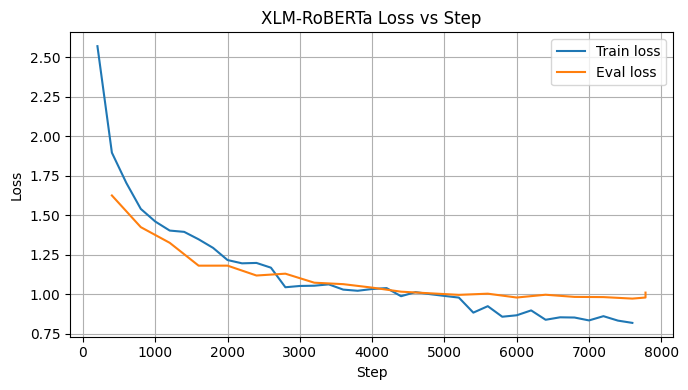

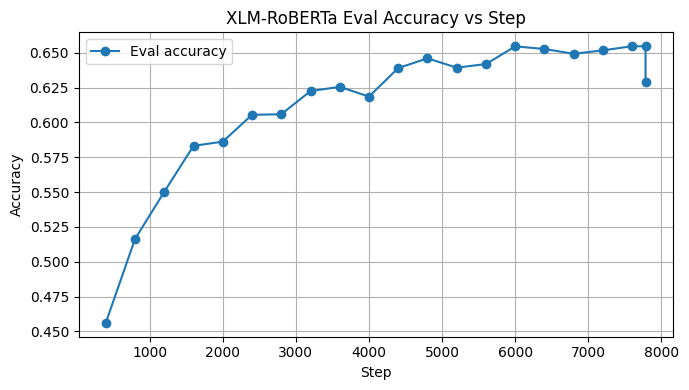

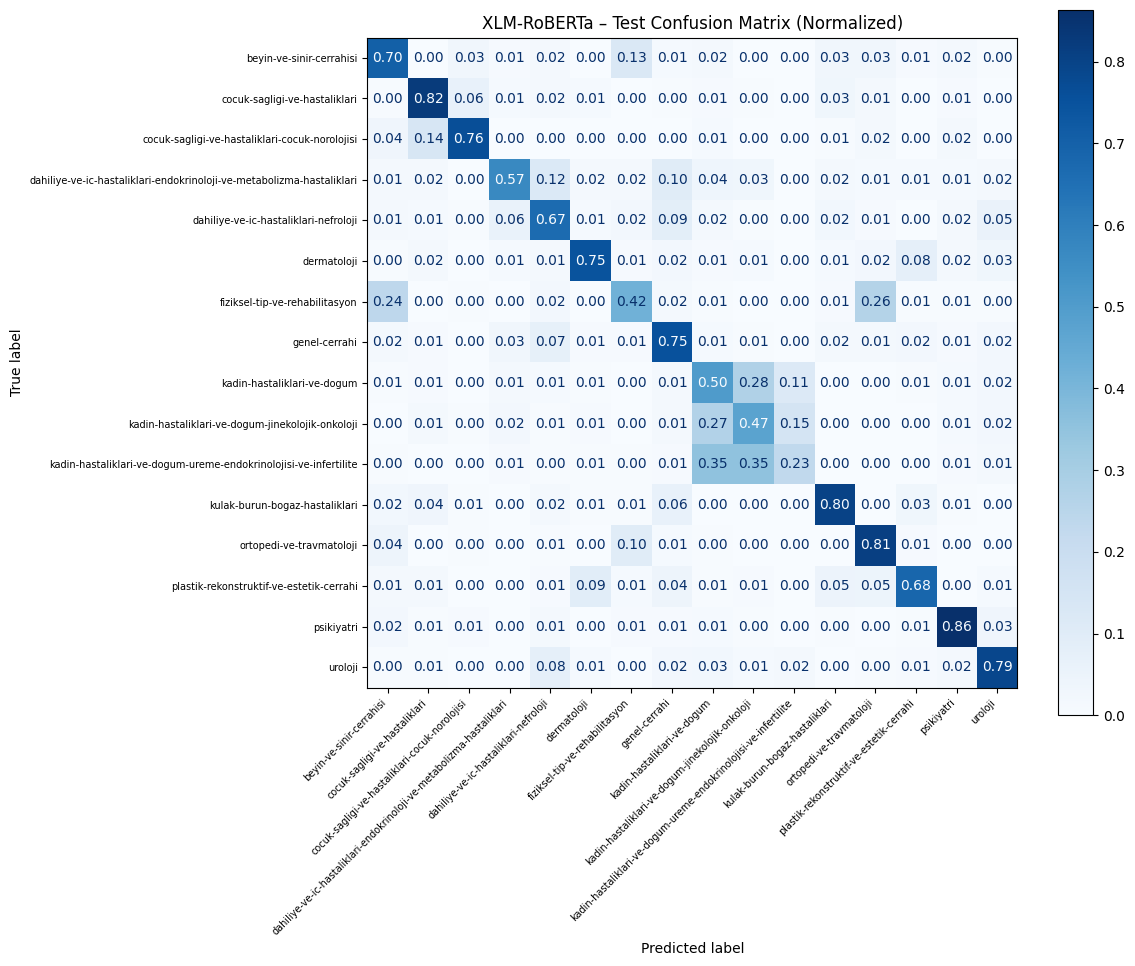

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay  # garanti olsun

print("=== XLM-R – Validation Sonuçları ===")
val_metrics_xlmr = trainer_xlmr.evaluate(eval_dataset=val_tok_xlmr)
print(val_metrics_xlmr)

print("\n=== XLM-R – Test Sonuçları ===")
test_metrics_xlmr = trainer_xlmr.evaluate(eval_dataset=test_tok_xlmr)
print(test_metrics_xlmr)

results_tr["XLM-R"] = {
    "val": val_metrics_xlmr,
    "test": test_metrics_xlmr,
}

plot_training_curves(trainer_xlmr, title_prefix="XLM-RoBERTa")

plot_confusion_matrix_transformer_labels(
    trainer_xlmr,
    test_tok_xlmr,
    "XLM-RoBERTa – Test Confusion Matrix (Normalized)"
)


In [ ]:
import os

xlmr_save_dir = "saved_models/xlmr-doctorsitesi-best"
os.makedirs(xlmr_save_dir, exist_ok=True)

trainer_xlmr.model.save_pretrained(xlmr_save_dir)
tokenizer_xlmr.save_pretrained(xlmr_save_dir)

print("XLM-R en iyi model ve tokenizer kaydedildi:", xlmr_save_dir)


XLM-R en iyi model ve tokenizer kaydedildi: saved_models/xlmr-doctorsitesi-best


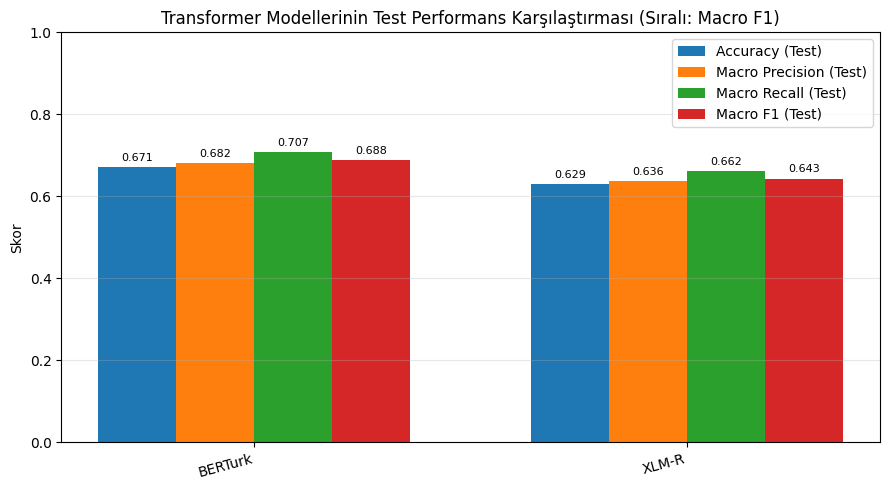

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

model_names_tr = list(results_tr.keys())

def get_metric(m, key):
    d = results_tr[m]["test"]
    return d.get(key, d.get("eval_" + key.replace("eval_", ""), None))

acc_test_tr  = [results_tr[m]["test"].get("eval_accuracy") for m in model_names_tr]
prec_test_tr = [results_tr[m]["test"].get("eval_macro_precision") for m in model_names_tr]
rec_test_tr  = [results_tr[m]["test"].get("eval_macro_recall") for m in model_names_tr]
f1_test_tr   = [results_tr[m]["test"].get("eval_macro_f1") for m in model_names_tr]

if any(v is None for v in acc_test_tr + prec_test_tr + rec_test_tr + f1_test_tr):
    raise ValueError("results_tr içinde beklenen eval_* metriklerinden biri yok. results_tr['MODEL']['test'] sözlüğünü kontrol et.")

order = np.argsort(f1_test_tr)[::-1]
model_names_tr = [model_names_tr[i] for i in order]
acc_test_tr    = [acc_test_tr[i] for i in order]
prec_test_tr   = [prec_test_tr[i] for i in order]
rec_test_tr    = [rec_test_tr[i] for i in order]
f1_test_tr     = [f1_test_tr[i] for i in order]

x = np.arange(len(model_names_tr))
width = 0.18

plt.figure(figsize=(9, 5))
bars_acc  = plt.bar(x - 1.5*width, acc_test_tr,  width, label="Accuracy (Test)")
bars_prec = plt.bar(x - 0.5*width, prec_test_tr, width, label="Macro Precision (Test)")
bars_rec  = plt.bar(x + 0.5*width, rec_test_tr,  width, label="Macro Recall (Test)")
bars_f1   = plt.bar(x + 1.5*width, f1_test_tr,   width, label="Macro F1 (Test)")

plt.xticks(x, model_names_tr, rotation=15, ha="right")
plt.ylabel("Skor")
plt.ylim(0, 1.0)
plt.title("Transformer Modellerinin Test Performans Karşılaştırması (Sıralı: Macro F1)")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

def annotate_bars(bars):
    for bar in bars:
        h = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            h + 0.01,
            f"{h:.3f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )

annotate_bars(bars_acc)
annotate_bars(bars_prec)
annotate_bars(bars_rec)
annotate_bars(bars_f1)

plt.show()


In [ ]:
import os
from google.colab import files

zip_name = "saved_models.zip"

if os.path.exists(zip_name):
    os.remove(zip_name)

%cd /content
!zip -r {zip_name} saved_models

files.download(zip_name)


/content
  adding: saved_models/ (stored 0%)
  adding: saved_models/ml/ (stored 0%)
  adding: saved_models/ml/bundle.joblib (deflated 13%)
  adding: saved_models/ml/linearsvm_best.joblib (deflated 4%)
  adding: saved_models/ml/tfidf_vectorizer.joblib (deflated 71%)
  adding: saved_models/ml/id2label.json (deflated 59%)
  adding: saved_models/ml/logreg_best.joblib (deflated 4%)
  adding: saved_models/ml/label2id.json (deflated 57%)
  adding: saved_models/berturk-doctorsitesi-best/ (stored 0%)
  adding: saved_models/berturk-doctorsitesi-best/config.json (deflated 66%)
  adding: saved_models/berturk-doctorsitesi-best/model.safetensors (deflated 7%)
  adding: saved_models/berturk-doctorsitesi-best/special_tokens_map.json (deflated 42%)
  adding: saved_models/berturk-doctorsitesi-best/vocab.txt (deflated 53%)
  adding: saved_models/berturk-doctorsitesi-best/tokenizer_config.json (deflated 75%)
  adding: saved_models/berturk-doctorsitesi-best/tokenizer.json (deflated 70%)
  adding: saved_mod

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!zip -r /content/saved_models.zip /content/saved_models

!cp /content/saved_models.zip "/content/drive/MyDrive/"



Mounted at /content/drive
  adding: content/saved_models/ (stored 0%)
  adding: content/saved_models/ml/ (stored 0%)
  adding: content/saved_models/ml/bundle.joblib (deflated 13%)
  adding: content/saved_models/ml/linearsvm_best.joblib (deflated 4%)
  adding: content/saved_models/ml/tfidf_vectorizer.joblib (deflated 71%)
  adding: content/saved_models/ml/id2label.json (deflated 59%)
  adding: content/saved_models/ml/logreg_best.joblib (deflated 4%)
  adding: content/saved_models/ml/label2id.json (deflated 57%)
  adding: content/saved_models/berturk-doctorsitesi-best/ (stored 0%)
  adding: content/saved_models/berturk-doctorsitesi-best/config.json (deflated 66%)
  adding: content/saved_models/berturk-doctorsitesi-best/model.safetensors (deflated 7%)
  adding: content/saved_models/berturk-doctorsitesi-best/special_tokens_map.json (deflated 42%)
  adding: content/saved_models/berturk-doctorsitesi-best/vocab.txt (deflated 53%)
  adding: content/saved_models/berturk-doctorsitesi-best/tokeni